In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_excel("Omnify-Analyst-Intership-Task.xlsx")

In [3]:
# Create an ExcelFile object
excel_file = pd.ExcelFile("Omnify-Analyst-Intership-Task.xlsx")

# Get the sheet names from the Excel file
sheet_names = excel_file.sheet_names

# Count the number of sheets
num_sheets = len(sheet_names)

# Print the number of sheets
print("Number of sheets:", num_sheets)


Number of sheets: 2


In [4]:
excel_file = "Omnify-Analyst-Intership-Task.xlsx"

all_sheets = pd.read_excel(excel_file, sheet_name=None)

# Access the first sheet (Sheet1) from the dictionary
df_sheet1 = all_sheets['Google Ads Data']

# Access the second sheet (Sheet2) from the dictionary
df_sheet2 = all_sheets['Listing Site Data']

In [5]:
df_sheet1.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,...,Payment Date,Country,weeks,unique_weeks,clicks_total,impressions_total,cost_total,totalo_leads,total_prospects,Unnamed: 21
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,...,2021-02-03,USA,2021 w5,2021 w5,15.0,319.0,154.79,1.0,2.0,NaN
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,...,NaT,USA,2021 w5,2021 w6,19.0,373.0,192.58,0.0,1.0,NaN
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,...,2021-03-13,USA,2021 w5,2021 w7,21.0,364.0,216.13,0.0,1.0,NaN
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,...,NaT,USA,2021 w5,2021 w8,35.0,671.0,235.30,0.0,2.0,NaN
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,...,NaT,USA,2021 w5,2021 w9,22.0,478.0,190.90,0.0,1.0,NaN


In [6]:
df_sheet1.columns

Index(['Week', 'Campaign', 'Ad group', 'Keyword type', 'Search Keyword',
       'Currency', 'Clicks', 'Impressions', 'Cost ($)', 'Leads', 'Prospects',
       'Payment ($)', 'Payment Date', 'Country', 'weeks', 'unique_weeks',
       'clicks_total', 'impressions_total', 'cost_total', 'totalo_leads',
       'total_prospects', 'Unnamed: 21'],
      dtype='object')

In [7]:
columns_to_remove = ['weeks', 'unique_weeks',
       'clicks_total', 'impressions_total', 'cost_total', 'totalo_leads',
       'total_prospects','Unnamed: 21']
df_sheet1 = df_sheet1.drop(columns=columns_to_remove)

df_sheet1.head()


,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,2021-02-03,USA
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaT,USA
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,"$1,188",2021-03-13,USA
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaT,USA
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaT,USA


In [8]:
df_sheet1['Week'] = pd.to_datetime(df_sheet1['Week'])

# Group by 'Week' and calculate the sum of 'Cost ($)' and 'Leads'
weekly_metrics = df_sheet1.groupby('Week').agg({'Cost ($)': 'sum', 'Leads': 'sum'})

# Calculate 'Returns %' for each week
weekly_metrics['Returns %'] = (weekly_metrics['Leads'] / weekly_metrics['Cost ($)']) * 100

# Group by 'Month' and calculate the sum of 'Cost ($)' and 'Leads'
df_sheet1['Month'] = df_sheet1['Week'].dt.to_period('M')
monthly_metrics = df_sheet1.groupby('Month').agg({'Cost ($)': 'sum', 'Leads': 'sum'})

# Calculate 'Returns %' for each month
monthly_metrics['Returns %'] = (monthly_metrics['Leads'] / monthly_metrics['Cost ($)']) * 100

# Convert the 'Month' column to strings for plotting
monthly_metrics.index = monthly_metrics.index.astype(str)

print("Weekly Metrics:")
print(weekly_metrics)

# Display the combined report for monthly metrics
print("\nMonthly Metrics:")
print(monthly_metrics)

Weekly Metrics:
            Cost ($)  Leads  Returns %
Week                                  
2021-01-25    154.79      1   0.646037
2021-02-01    192.58      0   0.000000
2021-02-08    216.13      0   0.000000
2021-02-15    235.30      0   0.000000
2021-02-22    190.90      0   0.000000
2021-03-01    141.40      0   0.000000
2021-03-08    258.20      3   1.161890
2021-03-15    184.36      1   0.542417
2021-03-22    308.73      1   0.323908
2021-03-29    172.11      0   0.000000
2021-04-05    176.96      2   1.130199
2021-04-12    137.21      1   0.728810
2021-04-19     87.38      1   1.144427
2021-04-26    103.26      1   0.968429
2021-05-03    229.37      1   0.435977

Monthly Metrics:
         Cost ($)  Leads  Returns %
Month                              
2021-01    154.79      1   0.646037
2021-02    834.91      0   0.000000
2021-03   1064.80      5   0.469572
2021-04    504.81      5   0.990472
2021-05    229.37      1   0.435977


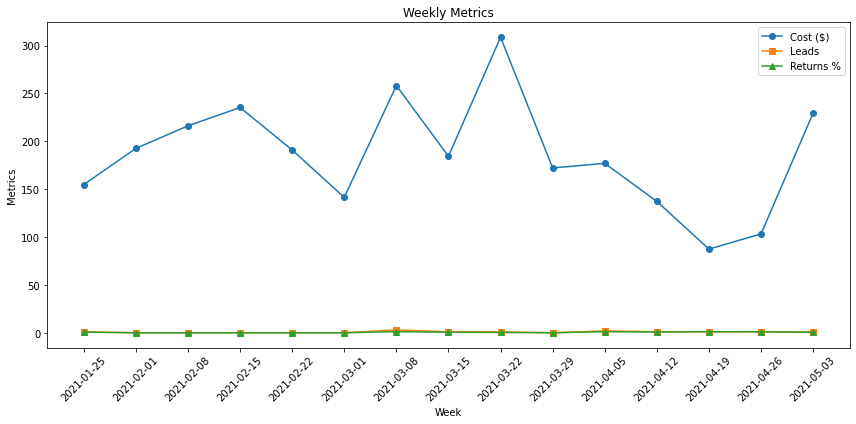

In [9]:
plt.figure(figsize=(12, 6))
index = np.arange(len(weekly_metrics.index))

plt.plot(index, weekly_metrics['Cost ($)'], label='Cost ($)', marker='o')
plt.plot(index, weekly_metrics['Leads'], label='Leads', marker='s')
plt.plot(index, weekly_metrics['Returns %'], label='Returns %', marker='^')

plt.xlabel('Week')
plt.ylabel('Metrics')
plt.title('Weekly Metrics')
plt.xticks(index, weekly_metrics.index.strftime('%Y-%m-%d'), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


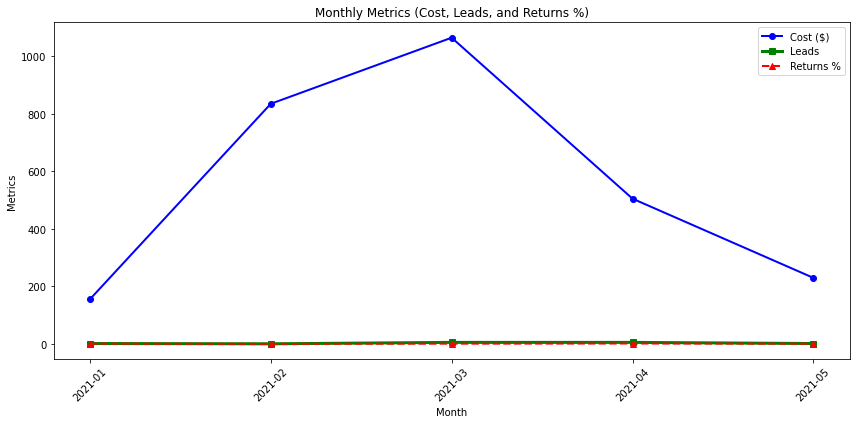

In [10]:
plt.figure(figsize=(12, 6))

x = monthly_metrics.index
y_cost = monthly_metrics['Cost ($)']
y_leads = monthly_metrics['Leads']
y_returns = monthly_metrics['Returns %']

plt.plot(x, y_cost, label='Cost ($)', color='blue', marker='o', linestyle='-', linewidth=2)
plt.plot(x, y_leads, label='Leads', color='green', marker='s', linestyle='-', linewidth=3)
plt.plot(x, y_returns, label='Returns %', color='red', marker='^', linestyle='dashed', linewidth=2)

plt.xlabel('Month')
plt.ylabel('Metrics')
plt.title('Monthly Metrics (Cost, Leads, and Returns %)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


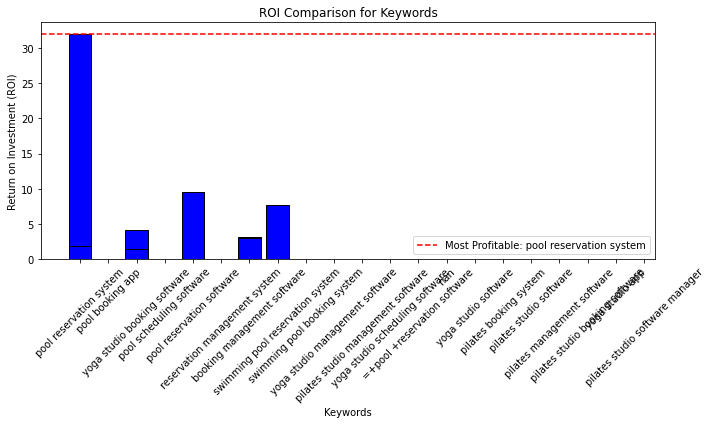

In [11]:

# Calculated ROI for each keyword
df_sheet1['ROI'] = (df_sheet1['Leads'] / df_sheet1['Cost ($)']) * 100

# Identify the most profitable keyword
most_profitable_keyword = df_sheet1.loc[df_sheet1['ROI'].idxmax(), 'Search Keyword']

# Converted 'Search Keyword' column to strings
df_sheet1['Search Keyword'] = df_sheet1['Search Keyword'].astype(str)

# Create a bar chart comparing ROI for each keyword
plt.figure(figsize=(10, 6))
plt.bar(df_sheet1['Search Keyword'], df_sheet1['ROI'], color='b',edgecolor = "Black")
plt.xlabel('Keywords')
plt.ylabel('Return on Investment (ROI)')
plt.title('ROI Comparison for Keywords')
plt.xticks(rotation=45)
plt.axhline(y=df_sheet1['ROI'].max(), color='r', linestyle='dashed', label=f'Most Profitable: {most_profitable_keyword}')
plt.legend()
plt.tight_layout()
plt.show()


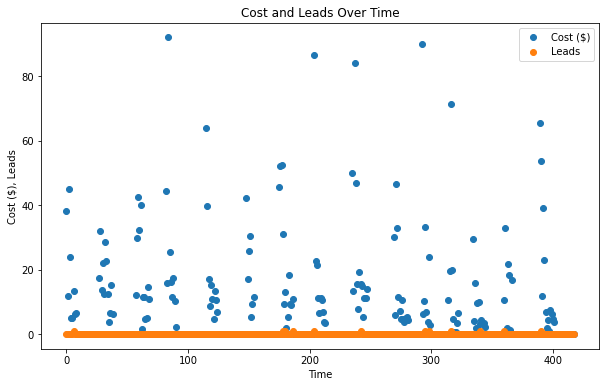

In [12]:
# Look for insights by analyzing data points on time series graphs

# Plot 'Cost ($)' and 'Leads' over time
plt.figure(figsize=(10, 6))
plt.scatter(df_sheet1.index, df_sheet1['Cost ($)'], label='Cost ($)')
plt.scatter(df_sheet1.index, df_sheet1['Leads'], label='Leads')
plt.xlabel('Time')
plt.ylabel('Cost ($), Leads')
plt.title('Cost and Leads Over Time')
plt.legend()
plt.show()


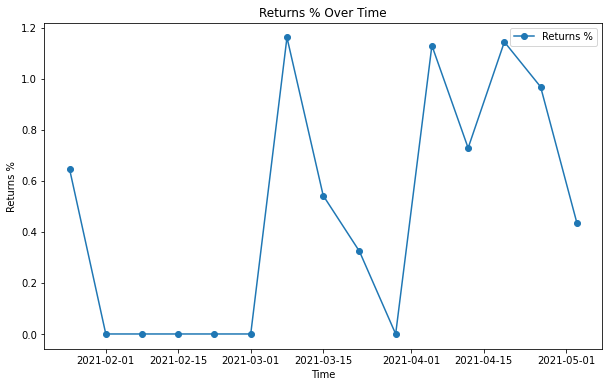

In [13]:
# Plot 'Returns %' over time
plt.figure(figsize=(10, 6))
plt.plot(weekly_metrics.index, weekly_metrics['Returns %'], label='Returns %',marker="o")
plt.xlabel('Time')
plt.ylabel('Returns %')
plt.title('Returns % Over Time')
plt.legend()
plt.show()


In [14]:
# Calculate growth rate for 'Cost ($)' and 'Leads'
df_sheet1['Cost Growth Rate'] = df_sheet1['Cost ($)'].pct_change() * 100
df_sheet1['Leads Growth Rate'] = df_sheet1['Leads'].pct_change() * 100


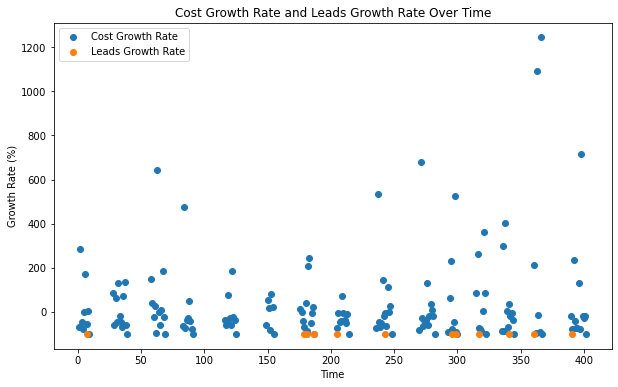

In [15]:
# Plot 'Cost Growth Rate' and 'Leads Growth Rate' over time
plt.figure(figsize=(10, 6))
plt.scatter(df_sheet1.index, df_sheet1['Cost Growth Rate'], label='Cost Growth Rate')
plt.scatter(df_sheet1.index, df_sheet1['Leads Growth Rate'], label='Leads Growth Rate')
plt.xlabel('Time')
plt.ylabel('Growth Rate (%)')
plt.title('Cost Growth Rate and Leads Growth Rate Over Time')
plt.legend()
plt.show()


In [16]:
#only one country is their. no details about other country

In [17]:
df_sheet2.head(30)

,Product Name,Categories,Date of Report,Average Position,Clicks,Leads,Money Spent ($),Channel,Location,Prospects,Paid,Paid Date,weeks,unique_weeks,Money Spent In a week,PAID(WEEK),total_leads
0,Omnify,Coaching,2020-10-20,13.0,1.0,NaN,2.0,Capterra,UNITED STATES,NaN,NaN,NaT,2020 W43,2020 W43,60.00,0.0,0.0
1,Omnify,Dance Studio,2020-10-20,20.0,1.0,NaN,2.0,Capterra,UNITED KINGDOM,NaN,NaN,NaT,2020 W43,2020 W44,351.50,0.0,0.0
2,Omnify,Personal Trainer,2020-10-20,6.0,1.0,NaN,2.0,Capterra,SINGAPORE,NaN,NaN,NaT,2020 W43,2020 W45,640.25,0.0,3.0
3,Omnify,Scheduling,2020-10-20,59.0,1.0,NaN,2.0,GetApp,UNITED STATES,NaN,NaN,NaT,2020 W43,2020 W46,2664.50,0.0,5.0
4,Omnify,Class Registration,2020-10-21,6.0,1.0,NaN,2.0,Capterra,AUSTRALIA,NaN,NaN,NaT,2020 W43,2020 W47,403.00,0.0,2.0
5,Omnify,Class Registration,2020-10-21,16.0,1.0,NaN,2.0,Capterra,UNITED STATES,NaN,NaN,NaT,2020 W43,2020 W48,503.00,0.0,1.0
6,Omnify,Fitness,2020-10-21,18.0,1.0,NaN,2.0,Capterra,UNITED KINGDOM,NaN,NaN,NaT,2020 W43,2020 W49,707.25,0.0,4.0
7,Omnify,Personal Trainer,2020-10-21,24.0,1.0,NaN,2.0,GetApp,CANADA,NaN,NaN,NaT,2020 W43,2020 W50,970.85,0.0,6.0
8,Omnify,Scheduling,2020-10-21,47.0,1.0,NaN,2.0,GetApp,CANADA,NaN,NaN,NaT,2020 W43,2020 W51,886.05,0.0,4.0
9,Omnify,Swim School,2020-10-21,8.0,1.0,NaN,2.0,Capterra,UNITED STATES,NaN,NaN,NaT,2020 W43,2020 W52,1218.00,0.0,4.0


In [18]:
# for 2nd sheet


In [19]:
# Assuming df_sheet2 is your DataFrame representing the given data

# Convert the 'Date of Report' column to datetime type
df_sheet2['Date of Report'] = pd.to_datetime(df_sheet2['Date of Report'])

# Extract week and month from 'Date of Report'
df_sheet2['Week'] = df_sheet2['Date of Report'].dt.strftime('%Y W%U')
df_sheet2['Month'] = df_sheet2['Date of Report'].dt.to_period('M')

# Calculate the total spends and total returns for each week
weekly_metrics = df_sheet2.groupby('Week').agg({
    'Money Spent ($)': 'sum',
    'Leads': 'sum'
}).reset_index()

# Calculate the return for each week
weekly_metrics['Returns %'] = (weekly_metrics['Leads'] / weekly_metrics['Money Spent ($)']) * 100

# Calculate the total spends and average returns for each month
monthly_metrics = df_sheet2.groupby('Month').agg({
    'Money Spent ($)': 'sum',
    'Leads': 'sum'
}).reset_index()

# Calculate the return for each month
monthly_metrics['Returns %'] = (monthly_metrics['Leads'] / monthly_metrics['Money Spent ($)']) * 100

# Display the combined report
print("Weekly Metrics:")
print(weekly_metrics)

print("\nMonthly Metrics:")
print(monthly_metrics)


Weekly Metrics:
        Week  Money Spent ($)  Leads  Returns %
0   2020 W42            60.00    0.0   0.000000
1   2020 W43           351.50    0.0   0.000000
2   2020 W44           640.25    3.0   0.468567
3   2020 W45          2664.50    5.0   0.187652
4   2020 W46           403.00    2.0   0.496278
5   2020 W47           503.00    1.0   0.198807
6   2020 W48           707.25    4.0   0.565571
7   2020 W49           970.85    6.0   0.618015
8   2020 W50           886.05    4.0   0.451442
9   2020 W51          1218.00    4.0   0.328407
10  2020 W52           813.65    5.0   0.614515
11  2021 W00           195.50    0.0   0.000000
12  2021 W01          1064.50    3.0   0.281822
13  2021 W02          1503.00   14.0   0.931470
14  2021 W03          1496.00   14.0   0.935829
15  2021 W04           392.00    4.0   1.020408
16  2021 W05          1012.00    9.0   0.889328
17  2021 W06          1660.00   18.0   1.084337
18  2021 W07          1193.75    9.0   0.753927
19  2021 W08           6

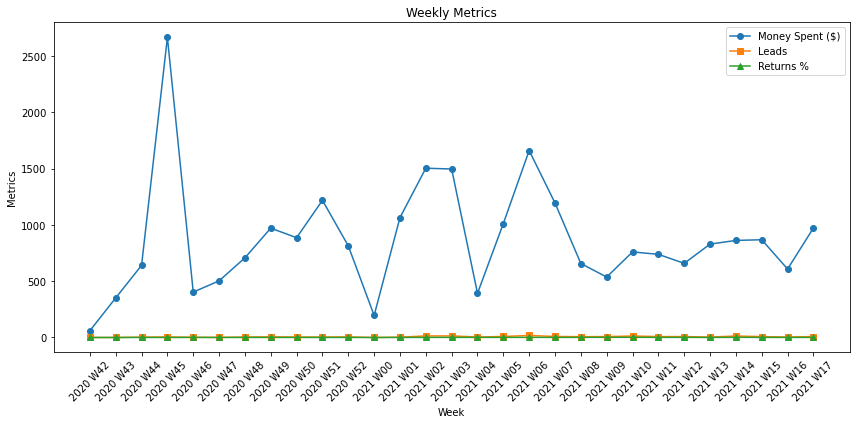

In [20]:
plt.figure(figsize=(12, 6))

# Set the x-axis and plot the metrics
index = np.arange(len(weekly_metrics))

plt.plot(index, weekly_metrics['Money Spent ($)'], label='Money Spent ($)', marker='o')
plt.plot(index, weekly_metrics['Leads'], label='Leads', marker='s')
plt.plot(index, weekly_metrics['Returns %'], label='Returns %', marker='^')

# Set the x-axis labels and rotate them for better readability
plt.xticks(index, weekly_metrics['Week'], rotation=45)

# Set the labels and title
plt.xlabel('Week')
plt.ylabel('Metrics')
plt.title('Weekly Metrics')

# Show the legend
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

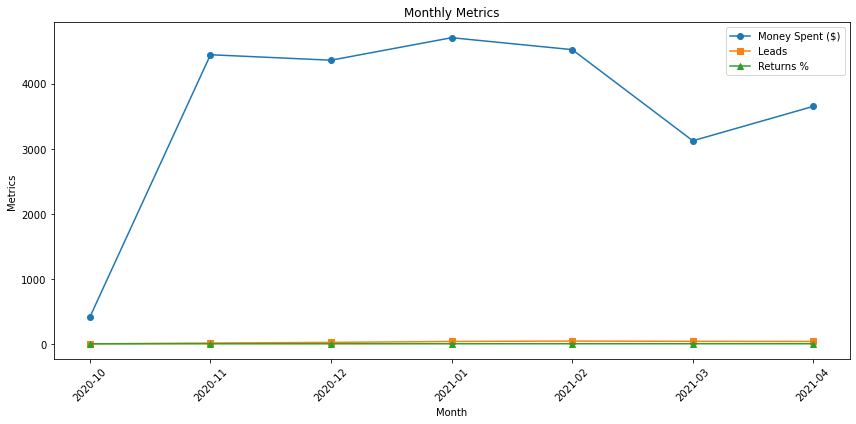

In [21]:
plt.figure(figsize=(12, 6))

# Set the x-axis and plot the metrics
index = np.arange(len(monthly_metrics))

plt.plot(index, monthly_metrics['Money Spent ($)'], label='Money Spent ($)', marker='o')
plt.plot(index, monthly_metrics['Leads'], label='Leads', marker='s')
plt.plot(index, monthly_metrics['Returns %'], label='Returns %', marker='^')

# Set the x-axis labels and rotate them for better readability
plt.xticks(index, monthly_metrics['Month'], rotation=45)

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Metrics')
plt.title('Monthly Metrics')

# Show the legend
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [22]:

# Assuming your data is stored in a DataFrame called df
# Calculate total money spent and total leads for each channel
channel_profitability = df_sheet2.groupby('Channel').agg({
    'Money Spent ($)': 'sum',
    'Leads': 'sum'
})

# Calculate the revenue per lead for each channel
channel_profitability['Revenue per Lead'] = channel_profitability['Money Spent ($)'] / channel_profitability['Leads']

# Find the most profitable channel by sorting on 'Revenue per Lead' in descending order
most_profitable_channel = channel_profitability.sort_values(by='Revenue per Lead', ascending=False).head()

print("Most Profitable Channel:")
print(most_profitable_channel)


Most Profitable Channel:
                 Money Spent ($)  Leads  Revenue per Lead
Channel                                                  
Capterra                19461.85  138.0        141.027899
GetApp                   5449.90   44.0        123.861364
Software Advice           311.50    4.0         77.875000


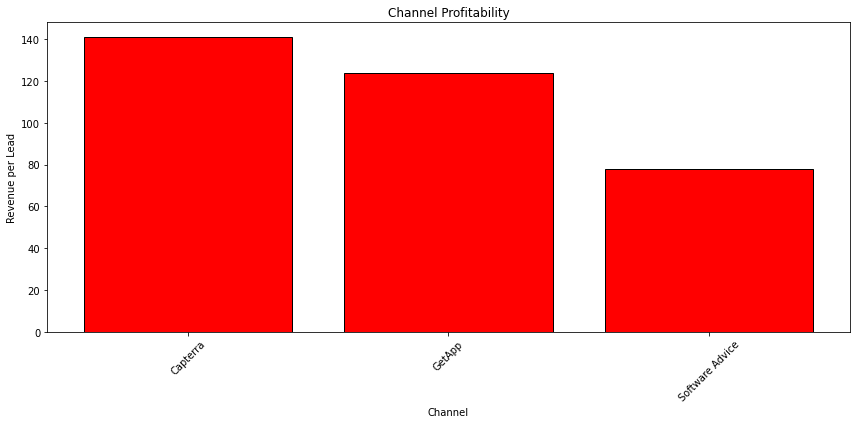

In [23]:
plt.figure(figsize=(12, 6))

plt.bar(channel_profitability.index, channel_profitability['Revenue per Lead'], color='red',edgecolor="black")
plt.xlabel('Channel')
plt.ylabel('Revenue per Lead')
plt.title('Channel Profitability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

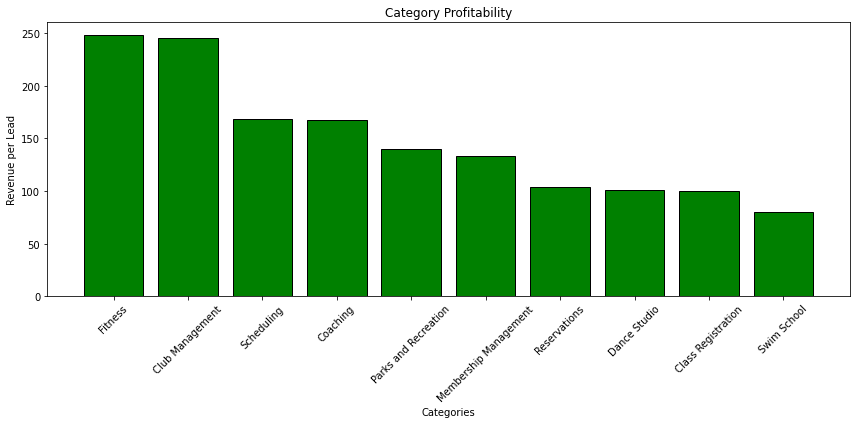

In [24]:

# Assuming 'df_sheet2' is the DataFrame containing the data
# (you should load or create the DataFrame before running this code)

# Calculate total money spent and total leads for each category
category_profitability = df_sheet2.groupby('Categories').agg({
    'Money Spent ($)': 'sum',
    'Leads': 'sum'
})

# Calculate the revenue per lead for each category
category_profitability['Revenue per Lead'] = category_profitability['Money Spent ($)'] / category_profitability['Leads']

# Sort the categories based on revenue per lead in descending order
category_profitability = category_profitability.sort_values(by='Revenue per Lead', ascending=False)

# Identify the most profitable category
most_profitable_category = category_profitability.index[0]

# Create a bar chart to compare categories with respect to profit
plt.figure(figsize=(12, 6))
plt.bar(category_profitability.index, category_profitability['Revenue per Lead'], color='green', edgecolor="black")
plt.xlabel('Categories')
plt.ylabel('Revenue per Lead')
plt.title('Category Profitability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Assuming you have a DataFrame called 'df' and a column called 'my_column'
unique_values = df_sheet2['Categories'].unique()
print(unique_values)


['Coaching' 'Dance Studio' 'Personal Trainer' 'Scheduling'
 'Class Registration' 'Fitness' 'Swim School' 'Yoga Studio'
 'Camp Management' 'Music School' 'Reservations' 'Club Management'
 'Gymnastics' 'Venue Management' 'Membership Management'
 'Parks and Recreation' 'Spa' 'Martial Arts' 'Pilates Studio']


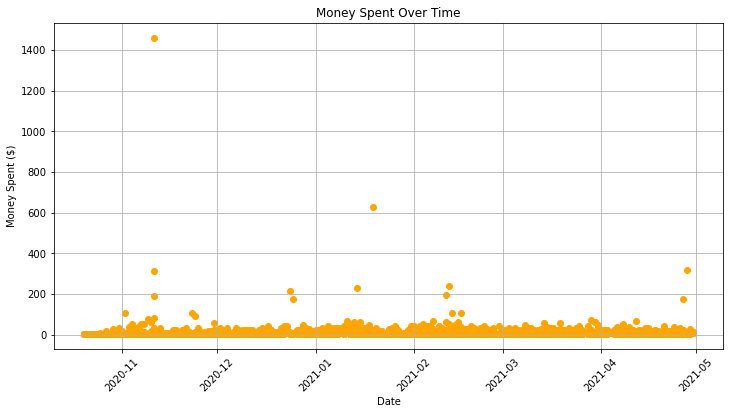

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(df_sheet2['Date of Report'], df_sheet2['Money Spent ($)'],marker="o",color="Orange")
plt.xlabel('Date')
plt.ylabel('Money Spent ($)')
plt.title('Money Spent Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


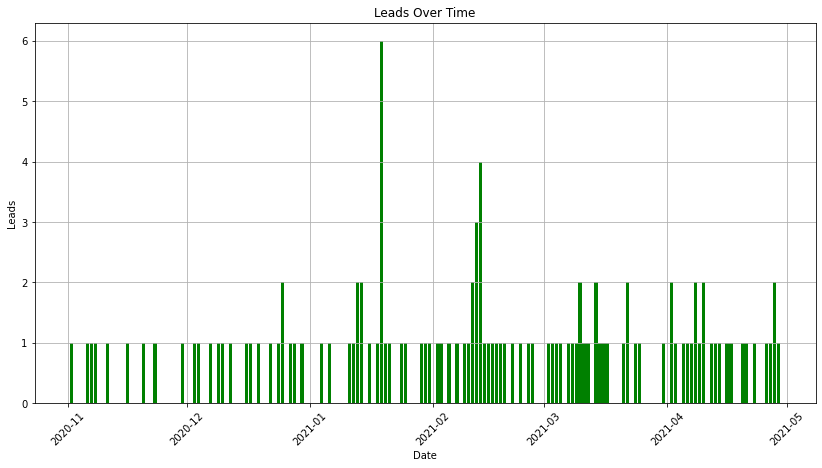

In [27]:
plt.figure(figsize=(14, 7))
plt.bar(df_sheet2['Date of Report'], df_sheet2['Leads'],color='green')
plt.xlabel('Date')
plt.ylabel('Leads')
plt.title('Leads Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


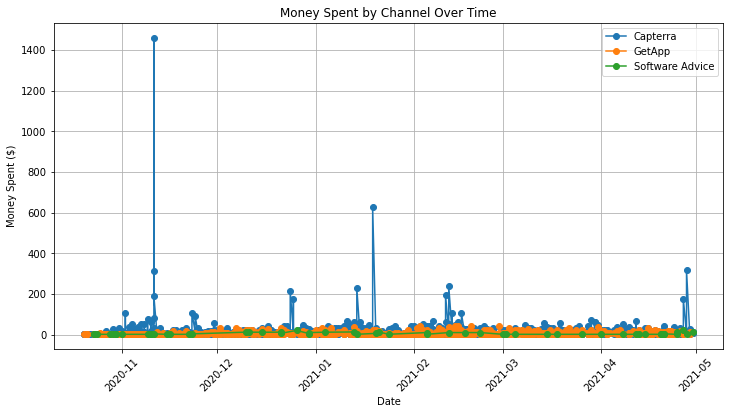

In [28]:
plt.figure(figsize=(12, 6))
for channel, channel_data in df_sheet2.groupby('Channel'):
    plt.plot(channel_data['Date of Report'], channel_data['Money Spent ($)'], marker='o', label=channel)
plt.xlabel('Date')
plt.ylabel('Money Spent ($)')
plt.title('Money Spent by Channel Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


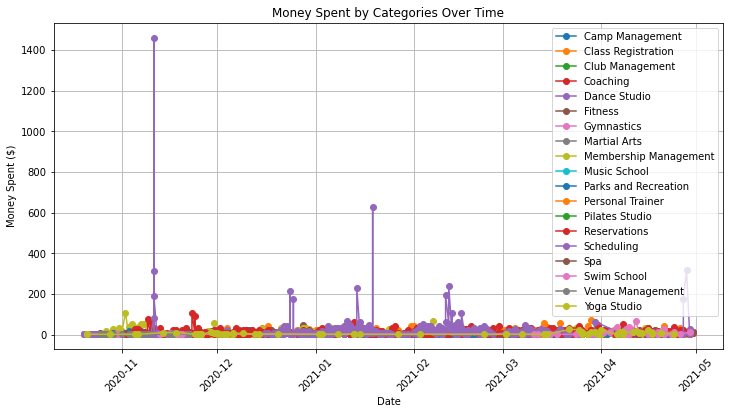

In [29]:
plt.figure(figsize=(12, 6))
for category, category_data in df_sheet2.groupby('Categories'):
    plt.plot(category_data['Date of Report'], category_data['Money Spent ($)'], marker='o', label=category)
plt.xlabel('Date')
plt.ylabel('Money Spent ($)')
plt.title('Money Spent by Categories Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


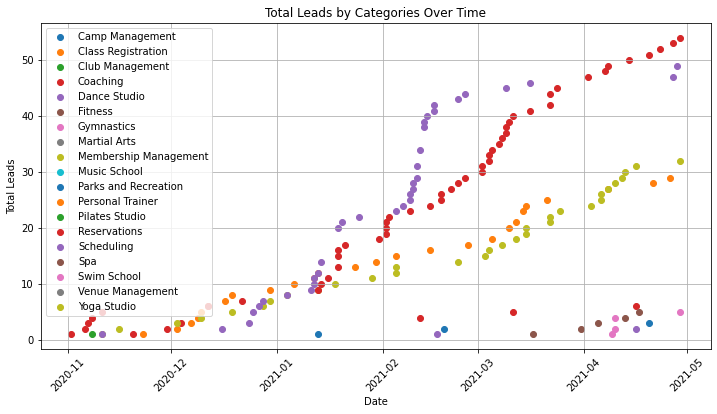

In [30]:
df_sheet2['Total Leads by Categories'] = df_sheet2.groupby('Categories')['Leads'].cumsum()

plt.figure(figsize=(12, 6))
for category, category_data in df_sheet2.groupby('Categories'):
    plt.scatter(category_data['Date of Report'], category_data['Total Leads by Categories'], marker='o', label=category)
plt.xlabel('Date')
plt.ylabel('Total Leads')
plt.title('Total Leads by Categories Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


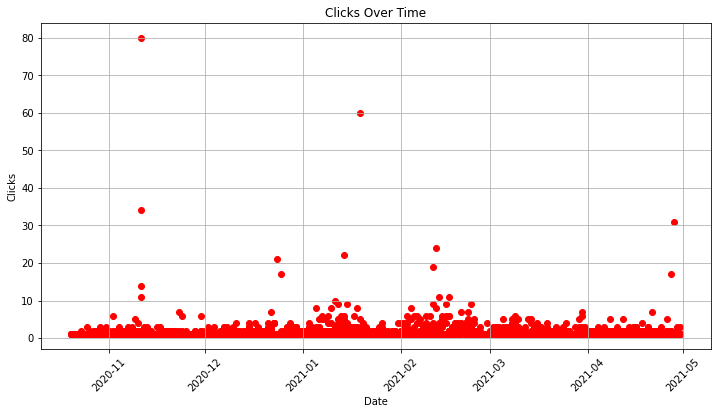

In [31]:
plt.figure(figsize=(12, 6))
plt.scatter(df_sheet2['Date of Report'], df_sheet2['Clicks'], marker='o',color="red")
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.title('Clicks Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


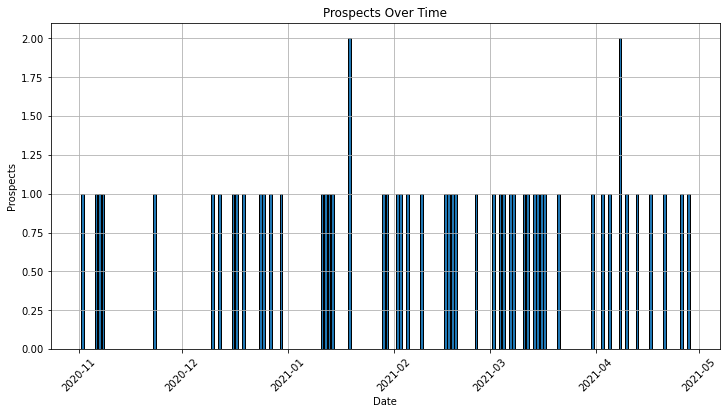

In [32]:
plt.figure(figsize=(12, 6))
plt.bar(df_sheet2['Date of Report'], df_sheet2['Prospects'],edgecolor="black")
plt.xlabel('Date')
plt.ylabel('Prospects')
plt.title('Prospects Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


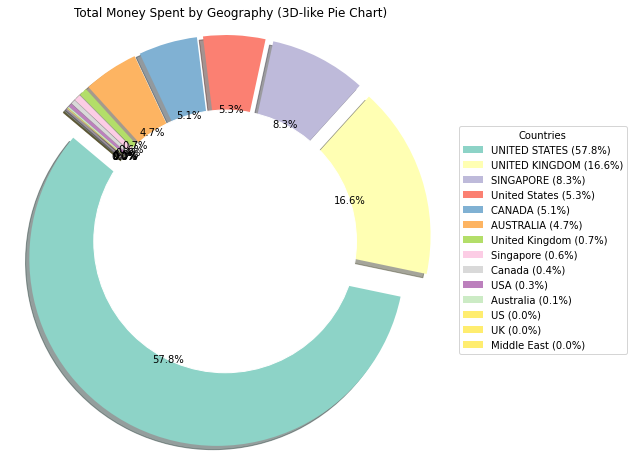

In [33]:
import matplotlib.pyplot as plt

# Calculate total money spent by geography (country)
grouped_by_location = df_sheet2.groupby('Location')['Money Spent ($)'].sum().reset_index()

# Sorting data by total money spent in descending order
grouped_by_location = grouped_by_location.sort_values(by='Money Spent ($)', ascending=False)

# Plotting the 3D-like pie chart
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# Pie chart parameters
colors = plt.cm.Set3(range(len(grouped_by_location)))
explode = [0.1] * len(grouped_by_location)  # Explode each slice slightly

wedges, texts, autotexts = ax.pie(grouped_by_location['Money Spent ($)'], labels=None, autopct='%1.1f%%', shadow=True, startangle=140, colors=colors, explode=explode)

# Equal aspect ratio ensures that the pie chart is drawn as a circle
ax.axis('equal')

# Add a circle at the center to create the 3D-like effect
center_circle = plt.Circle((0, 0), 0.7, color='white')
ax.add_patch(center_circle)

# Create custom legend for country names and percentage values
legend_labels = [f"{location} ({money:.1f}%)"
                 for location, money in zip(grouped_by_location['Location'], grouped_by_location['Money Spent ($)'] / grouped_by_location['Money Spent ($)'].sum() * 100)]
ax.legend(wedges, legend_labels, title='Countries', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Total Money Spent by Geography (3D-like Pie Chart)')
plt.show()
